In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import anndata as ad
    
import matplotlib.pyplot as plt

# Load data

## Load abc data

In [5]:
abc_root = Path('//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/abc_atlas/abc_atlas_data/')
brain_id = 'C57BL6J-638850'
version='20230830'

In [6]:
# load in the 'obs' cluster_annotations + parcellation_annotation metadata
ccf_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv', 
                        dtype={'cell_label':str}, 
                        index_col=0)

# flip y coords so the sections don't display upside down
flip_y=True
if flip_y:
    ccf_md_df[['y_section', 'y_reconstructed']] *= -1

In [8]:
ccf_md_df

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,-4.148963,6.6,...,brain,grey,HPF,DG,DG-po,#FFFFFF,#BFDAE3,#7ED04B,#7ED04B,#7ED04B
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,-7.309543,4.2,...,brain,grey,P,TRN,TRN,#FFFFFF,#BFDAE3,#FF9B88,#FFBA86,#FFBA86
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,-8.189973,4.0,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,-5.868655,2.4,...,brain,fiber tracts,cbf,arb,arb,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,-7.995842,4.4,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,-4.669243,8.8,...,brain,grey,Isocortex,SSp-n,SSp-n2/3,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,-3.695696,11.0,...,brain,grey,Isocortex,ACAd,ACAd5,#FFFFFF,#BFDAE3,#70FF71,#40A666,#40A666
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,-4.231188,9.2,...,brain,grey,Isocortex,SSp-m,SSp-m6a,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064


## Load MK's ccf coordinate csv

In [26]:
mk_root_dir = Path("/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/michaelkunst/MERSCOPES/mouse/atlas/mouse_638850")
ccf_coord_file = "alignment/ccf_cells_20230515.csv"
# ccf_coord_path = root_dir / ccf_coord_file

In [3]:
ccf_coord_df = pd.read_csv(mk_root_dir / ccf_coord_file, 
                           dtype={'cell_id':str}, 
                           index_col=0)

In [4]:
ccf_coord_df

,CCF_x,CCF_y,CCF_z,CCF_mapped
cell_id,,,,
1015221631100280149,11.381012,7.568434,4.986294,1
1015221631100280151,11.379708,7.580814,4.997273,1
1015221631100280153,11.380840,7.580913,5.027427,1
1015221631100280154,11.380599,7.547344,4.898267,1
1015221631100280155,11.381018,7.561526,4.961196,1
...,...,...,...,...
1104095511203140110,11.002863,2.013453,8.725482,1
1104095511203140146,11.002939,2.026600,8.775594,1
1104095511203140154,11.005152,2.016976,8.798595,1


In [89]:
bin_coord_df = pd.read_csv(mk_root_dir/'alignment/ccf_cells_20221201.csv',
                           dtype={'_index':str},
                           index_col=0)

In [90]:
bin_coord_df

,bin_flat_index,bin_x,bin_y,bin_z,ccf_x,ccf_y,ccf_z,mapped
_index,,,,,,,,
1019171907102340387-1,776480197,757,242,735,7.569841,2.415130,7.351729,1
1104095349101460194-1,555186303,903,595,525,9.029555,5.954714,5.252411,1
1017092617101450577,644015711,911,690,609,9.114144,6.904094,6.092410,1
1018093344101130233,355450697,1097,480,336,10.965015,4.803034,3.360594,1
1019171912201610094,614389600,880,646,581,8.796572,6.455316,5.814547,1
...,...,...,...,...,...,...,...,...
1017165415100930567,544103065,385,199,515,3.850724,1.990381,5.146237,1
1017155956102610748,280158638,518,241,265,5.175551,2.407665,2.650790,1
1017155956101980080-1,154744068,468,430,146,4.682860,4.295331,1.456830,1


## Load in other MK's files

### with "ccf3D" coords?

In [27]:
cirro_CCF_ad = ad.read_h5ad(mk_root_dir/'cirro_folder/atlas_brain_638850_CCF.h5ad', backed='r')

In [28]:
cirro_CCF_ad

AnnData object with n_obs × n_vars = 4334174 × 550 backed at '/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/michaelkunst/MERSCOPES/mouse/atlas/mouse_638850/cirro_folder/atlas_brain_638850_CCF.h5ad'
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'cluster_id', 'cluster_label', 'supertype_id_label', 'Level2_id_label', 'Level1_id_label', 'class_id_label', 'cluster_id.AIT16', 'nt_type_label', 'luster_id', 'subclass_id_label', 'He.label', 'He.cor', 'class_label', 'division_label', 'division_id_label', 'subclass_label', 'supertype_label', 'nt_type_combo_label', 'C

### with "global3D" & "corrected" coords

In [99]:
cirro_anno_ad = ad.read_h5ad(mk_root_dir/'cirro_folder/mouse_633850_new_region_anno.h5ad', backed='r')

In [100]:
cirro_anno_ad

AnnData object with n_obs × n_vars = 4334174 × 550 backed at '/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/michaelkunst/MERSCOPES/mouse/atlas/mouse_638850/cirro_folder/mouse_633850_new_region_anno.h5ad'
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'cluster_id', 'cluster_label', 'supertype_id_label', 'Level2_id_label', 'Level1_id_label', 'class_id_label', 'cluster_id.AIT16', 'nt_type_label', 'luster_id', 'class_id', 'division_id', 'division_label', 'higher_level_landmark', 'nt_type_combo_label', 'subclass_id', 'subclass_label', 'supertype_id', 'supertype_

### metadata csv with maybe some coords?

In [77]:
md_csv = pd.read_csv(mk_root_dir/'analysis/data/metadata_638850.csv',
                     dtype={'cell_id':str}, 
                     index_col=1)

In [78]:
md_csv

,Unnamed: 0,cl.v9_locked,volume,section,target_atlas_plate,avg.cor.v9_locked,cluster_id,cluster_id_label,supertype_id,supertype_label,...,nt_type_combo_label,structure_id,acronym,graph_order,CCF_level1,CCF_level2,CCF_x,CCF_y,CCF_z,CCF_mapped
cell_id,,,,,,,,,,,,,,,,,,,,,
1015221631100280149,1,5259,854.550296,1199650953,115,0.650622,5296,5296 VLMC NN_1,1187,VLMC NN_1,...,NaN,0,NaN,NaN,NaN,NaN,11.442246,7.445671,5.020755,1
1015221631100280151,2,5257,468.060843,1199650953,115,0.508624,5294,5294 ABC NN_1,1186,ABC NN_1,...,NaN,0,NaN,NaN,NaN,NaN,11.440511,7.462980,5.021528,1
1015221631100280153,3,5266,1177.236305,1199650953,115,0.463624,5299,5299 VLMC NN_1,1187,VLMC NN_1,...,NaN,0,NaN,NaN,NaN,NaN,11.442132,7.458679,5.061845,1
1015221631100280154,4,5259,698.245904,1199650953,115,0.662498,5296,5296 VLMC NN_1,1187,VLMC NN_1,...,NaN,0,NaN,NaN,NaN,NaN,11.441061,7.428906,4.922468,1
1015221631100280155,5,14930,527.169811,1199650953,115,0.494975,5219,5219 Astro-TE NN_1,1161,Astro-TE NN_1,...,NaN,0,NaN,NaN,NaN,NaN,11.441525,7.442610,4.985619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104095511203140110,4334170,5243,1498.336492,1199650975,101,0.584350,5304,5304 Peri NN_1,1191,Peri NN_1,...,NaN,1007,SIM,1067.0,CB,SIM,10.836423,2.005548,8.736957,1
1104095511203140146,4334171,5263,1627.388231,1199650975,101,0.666436,5298,5298 VLMC NN_1,1187,VLMC NN_1,...,NaN,1007,SIM,1067.0,CB,SIM,10.837139,2.015764,8.796633,1
1104095511203140154,4334172,5259,1009.183281,1199650975,101,0.761165,5296,5296 VLMC NN_1,1187,VLMC NN_1,...,NaN,1007,SIM,1067.0,CB,SIM,10.837978,2.011282,8.809715,1


# Plot coordinates

## section coords

In [29]:
# sorted(ccf_md_df['z_section'].unique())
z_pos = 6.4
curr_sec = ccf_md_df[ccf_md_df['z_section']==z_pos]
sec_cell_labels = curr_sec.index

In [93]:
ccf_coord_df.index

Index(['1015221631100280149', '1015221631100280151', '1015221631100280153',
       '1015221631100280154', '1015221631100280155', '1015221631100280156',
       '1015221631100280157', '1015221631100280161', '1015221631100280162',
       '1015221631100280163',
       ...
       '1104095511203140045', '1104095511203140056', '1104095511203140057',
       '1104095511203140058', '1104095511203140061', '1104095511203140110',
       '1104095511203140146', '1104095511203140154', '1104095511203140160',
       '1104095511203150028'],
      dtype='object', name='cell_id', length=4334174)

In [92]:
sec_ccf_coord_df = ccf_coord_df[ccf_coord_df.index.intersection(sec_cell_labels)]
sec_ccf_coord_df

KeyError: "None of [Index(['1018093344100040115-2', '1018093344100040142-2',\n       '1018093344100040145-1', '1018093344100050041-1',\n       '1018093344100050044-1', '1018093344100050045-1', '1018093344100050046',\n       '1018093344100050047-1', '1018093344100050048-1',\n       '1018093344100050049-1',\n       ...\n       '1018093344203710230', '1018093344203710231', '1018093344203720025',\n       '1018093344203720049', '1018093344203720051', '1018093344203720073',\n       '1018093344203720074', '1018093344203720081', '1018093344203720113',\n       '1018093344203720134'],\n      dtype='object', length=115779)] are in the [columns]"

In [30]:
# ref_labels = sec_cell_labels
sec_adata = cirro_CCF_ad[cirro_CCF_ad.obs_names.intersection(sec_cell_labels)].to_memory()

In [101]:
sec_cirro_anno_ad = cirro_anno_ad[cirro_anno_ad.obs_names.intersection(sec_cell_labels)].to_memory()

/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/miniconda3/envs/codeocean-thalamus-merfish-capsule/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [102]:
sec_cirro_anno_ad

AnnData object with n_obs × n_vars = 115779 × 550
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'cluster_id', 'cluster_label', 'supertype_id_label', 'Level2_id_label', 'Level1_id_label', 'class_id_label', 'cluster_id.AIT16', 'nt_type_label', 'luster_id', 'class_id', 'division_id', 'division_label', 'higher_level_landmark', 'nt_type_combo_label', 'subclass_id', 'subclass_label', 'supertype_id', 'supertype_label', 'CCF_landmark'
    uns: 'Level2_id_label_colors', 'cluster_label_colors'
    obsm: 'ccf3D', 'global3D', 'spatial', 'spatial_cirro', 'spatial_rotated'
    laye

Text(0.5, 1.0, 'corrected_x/y')

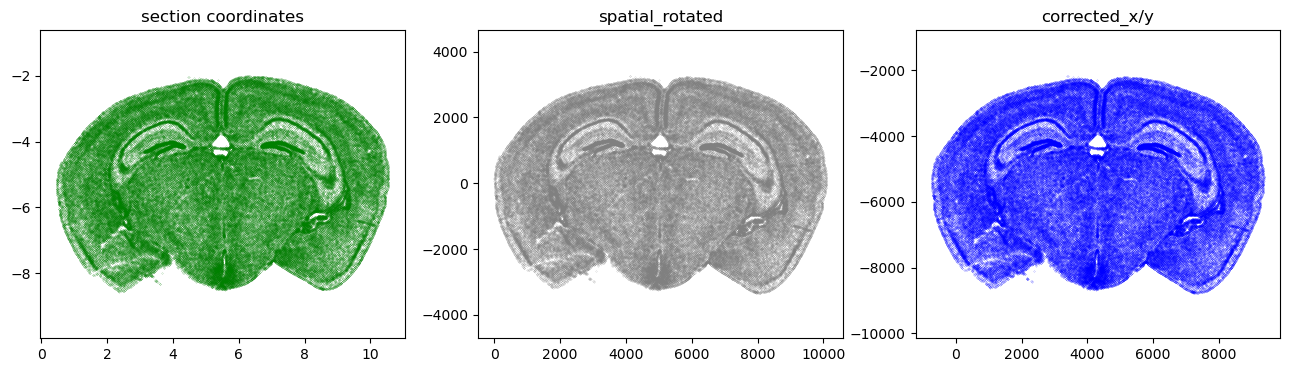

In [112]:
fig, axes = plt.subplots(1,3,figsize=(16,4))
axes = axes.ravel()


i=0
axes[i].scatter(curr_sec['x_section'], 
                curr_sec['y_section'],
                s=0.01, c ='green')
axes[i].axis('equal')
axes[i].set_title('x/y_section')


i=1
axes[i].scatter(sec_adata.obsm['spatial_rotated'][:,0],
                sec_adata.obsm['spatial_rotated'][:,1],
                s=0.01, c='grey')
axes[i].axis('equal')
axes[i].set_title('spatial_rotated')

# i=2
# axes[i].scatter(curr_sec['x_section']*1000, 
#                 (curr_sec['y_section']+5)*1000,
#                 s=0.01, c ='red')
# axes[i].axis('equal')


i=2
axes[i].scatter(sec_cirro_anno_ad.obs['corrected_x'],
                -sec_cirro_anno_ad.obs['corrected_y'],
                s=0.01, c='blue')
axes[i].axis('equal')
axes[i].set_title('corrected_x/y')

(-1.2826765441042516,
 11.106946600451934,
 -9.098752360229406,
 -1.6794609571817736)

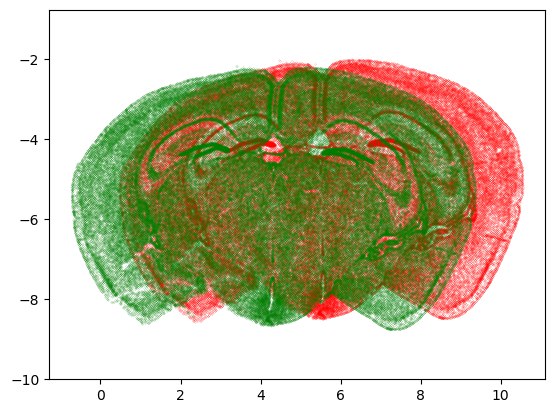

In [113]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(curr_sec['x_section'], 
                curr_sec['y_section'],
                s=0.01, c ='red')

ax.scatter(sec_cirro_anno_ad.obs['corrected_x']/1000,
            -sec_cirro_anno_ad.obs['corrected_y']/1000,
            s=0.01, c='green')
plt.axis('equal')

(-0.039930235686874316,
 11.179123746579856,
 -8.907781499215293,
 -1.6051348758837514)

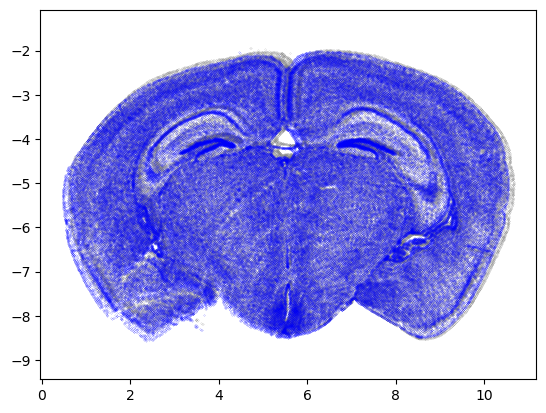

In [67]:
fig = plt.figure()
ax = plt.gca()

ax.scatter((sec_adata.obsm['spatial_rotated'][:,0]/1001)+0.6,
           (sec_adata.obsm['spatial_rotated'][:,1]/1001)-5.2,
           s=0.01, c='grey')

ax.scatter(curr_sec['x_section'], 
           curr_sec['y_section'],
           s=0.01, c ='blue')

plt.axis('equal')

## ccf vs reconstructed coords

In [94]:
sec_adata.obsm['ccf3D']

array([[ 7.61078405, -2.42677212,  3.61246085],
       [ 7.64552069, -2.33680868,  4.19698858],
       [ 7.61257076, -2.4166007 ,  3.62223196],
       ...,
       [ 7.9872427 , -0.79592812,  7.54758263],
       [ 7.81886768, -1.3259784 ,  5.05808258],
       [ 7.30467653, -5.38923931,  6.40028811]])

Text(0.5, 1.0, 'x/y_reconstructed')

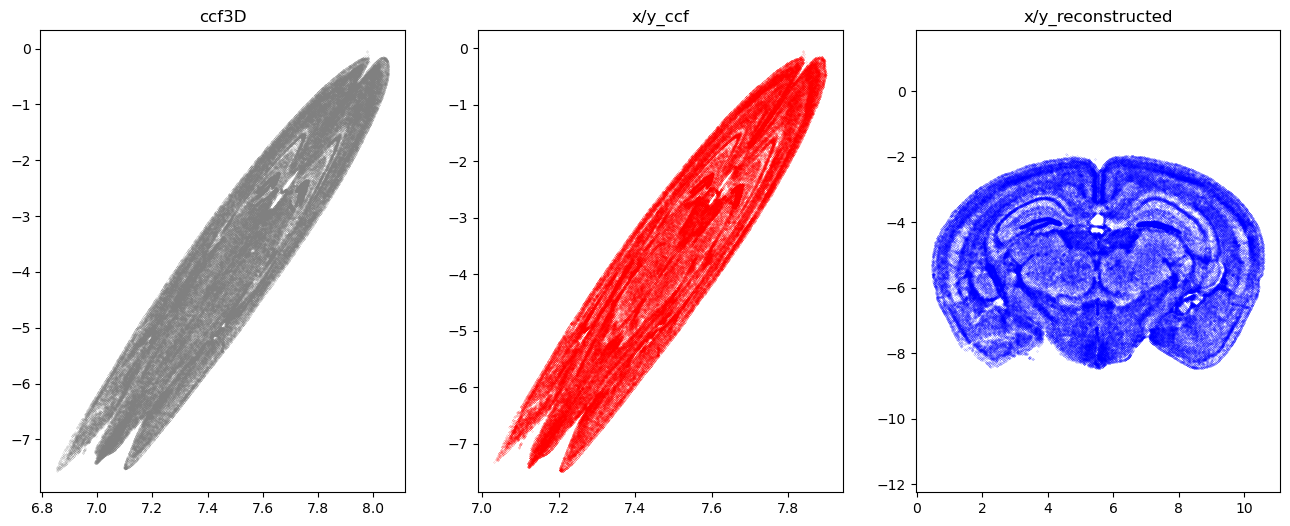

In [117]:
fig, axes = plt.subplots(1,3,figsize=(16,6))
axes = axes.ravel()

i=0
axes[i].scatter(sec_adata.obsm['ccf3D'][:,0],
                sec_adata.obsm['ccf3D'][:,1],
                s=0.01, c='grey')
# axes[i].axis('equal')
axes[i].set_title('ccf3D')

i=1
axes[i].scatter(curr_sec['x_ccf'], 
                -curr_sec['y_ccf'],
                s=0.01, c ='r')
# axes[i].axis('equal')
axes[i].set_title('x/y_ccf')


i=2
axes[i].scatter(curr_sec['x_reconstructed'], 
                curr_sec['y_reconstructed'],
                s=0.01, c ='blue')
axes[i].axis('equal')
axes[i].set_title('x/y_reconstructed')



# i=3
# axes[i].scatter(sec_bin_coord_df['bin_x'], 
#                 sec_bin_coord_df['bin_y'],
#                 s=0.01, c ='green')
# axes[i].axis('equal')